F:\Data\Two-way active avoidance behavior\Experiments 별 정리\pBLA GRAB DA\L127 GRAB DA3MF:\Data\Two-way active avoidance behavior\Experiments 별 정리\pBLA GRAB DA\L127 GRAB DA3MDoric file(*.csv)에서 Signal 과 Control만 추출해서 path 폴더 아래 /FP/ 폴더에 file 이름 + Signal로 저장

최하위 폴더의 이름은 3글자로 해주세요!

In [3]:
import pandas as pd
import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError: 
        print ('Error: Creating directory.' + directory)
#Doric에서 recording 한 raw data가 있는 폴더를 아래에 입력
path =  r'D:\15sec\vid'
print (path) 

createFolder(path[:-4]+'/FP/')

for root, dirs, files in os.walk(path):
    for fname in files:
        if('.csv' in fname): 

            full_name = os.path.join(root, fname)
            print('In Processing :' + full_name)
            data = pd.read_csv(full_name, header = 1)
            data.rename(columns = {'Time(s)' : 'Timestamp', 'AIn-1 - Dem (AOut-1)' : 'Control', 'AIn-1 - Dem (AOut-2)' : 'Signal'}, inplace = True)
            data=data[['Timestamp','Signal','Control']]
        
            data.to_csv(path[:-4]+'/FP/'+fname[:-8]+'Signal.csv', index = 0)

D:\15sec\vid
In Processing :D:\15sec\vid\L127M10 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M11 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M12 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M13 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M14 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M16 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M17 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M18 CS15sec_0000.csv
In Processing :D:\15sec\vid\L127M21 15SEC_0000.csv
In Processing :D:\15sec\vid\L127M22 15SEC_0000.csv
In Processing :D:\15sec\vid\L127M23 CS15SEC_0000.csv
In Processing :D:\15sec\vid\L127M24 CS15SEC_0000.csv


Doric file에서 Avoidance TTL 추출 (다른 사용자는 다음 cell을 실행하세요!)

In [ ]:
#TTL 파일 (_0.csv)을 CS on 동안만을 편집하는 코드 -> CS on 일 때 세번째 colounm이 1임
import pandas as pd
import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError: 
        print ('Error: Creating directory.' + directory)

#path =  filedialog.askdirectory(initialdir = "/", title = "Select directory")

#아래에 r'원하는 경로'로 입력 
path =  r''
print (path)  # 원하는 xlsx파일들이 포함된 폴더를 선택 #

createFolder(path[:-4]+'/TTL/')

for root, dirs, files in os.walk(path):
    for fname in files:
        if('.csv' in fname): 

            full_name = os.path.join(root, fname)
            print('In Processing :' + full_name)
            data = pd.read_csv(full_name, header = 1)
            
            for i in range(len(data.iloc[:,5])):
                if (data.iloc[i,5] == 0.5):
                    data.iloc[i,5] = data.iloc[i,5] + 0.5
                    
            Start = []
            End = []
            Event = []
            
            for i in range(len(data.iloc[:,5])):
                if(data.iloc[i,5] - data.iloc[i-1,5] == 1):
                    Start.append(data.iloc[i,0])
            for i in range(len(data.iloc[:,5])):
                if(data.iloc[i,5] - data.iloc[i-1,5] == -1):
                    End.append(data.iloc[i,0])
            for i in range(len(Start)):
                if End[i]-Start[i] > 14.99:
                    Event.append('Escape+')
                elif End[i]-Start[i] < 14.99:
                    Event.append('Avoidance+')
    
                df = pd.DataFrame(data = list(zip(Event, Start, End)), columns = ['Event','onset', 'offset'])
        
                df.to_csv(path[:-4]+'/TTL/'+fname[:-8]+'TTL.csv', index = 0)

TTL 바탕으로 Avoidance 횟수와 Latency 계산

In [ ]:
import pandas as pd
import os
import numpy as np

path = r'F:\Data\Two-way active avoidance behavior\Experiments 별 정리\pBLA Ppp1r1b GRAB DA\L153 PPPGRAB\TTL'

Subject = []
TotalNumberofAvoidance1 = []
AvoidanceLatency = []
for root, dirs, files in os.walk(path):
    for fname in files:
        if('.csv' in fname): 

            full_name = os.path.join(root, fname)
            print('In Processing :' + full_name)
            data = pd.read_csv(full_name, header = 0)
            AvoidanceLatencylist = []
            NumberofAvoidance2 = 0
            search = np.array(data['Event'].tolist())
            if 'Avoidance+' in search:         
                for i in range(len(data.iloc[:,0])):
                    if(data.iloc[i,0] == 'Avoidance+'):
                        NumberofAvoidance2 = NumberofAvoidance2 + 1
            for k in range(len(data.iloc[:,0])):
                latency = data.iloc[k,2] - data.iloc[k,1]
                AvoidanceLatencylist.append(latency)
                AvoidanceLatency1 = sum(AvoidanceLatencylist)/len(AvoidanceLatencylist)
            AvoidanceLatency.append(AvoidanceLatency1)
            Subject.append(fname[:-8])
            TotalNumberofAvoidance1.append(NumberofAvoidance2)
            
    df = pd.DataFrame(data = list(zip(Subject, TotalNumberofAvoidance1, AvoidanceLatency)), columns = ['Subject','Avoidance', 'Avoidance_Latency'])
            
    df.to_csv(path[:-4]+'/'+fname[:-8]+'_Avoidance.csv', index = 0)

dF/F 분석 code

전체 data를 분석 후 TTL-Pre ~ TTL+Post까지를 bout로 분석

D:\15sec/FP/
L127M10 CS15sec_Signal.csv
D:\15sec/FP/L127M10 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M11 CS15sec_Signal.csv
D:\15sec/FP/L127M11 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M12 CS15sec_Signal.csv
D:\15sec/FP/L127M12 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M13 CS15sec_Signal.csv
D:\15sec/FP/L127M13 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:154: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindft, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre, Post, 0, len(bindft.index)])
<ipython-input-4-612cd7bdce3d>:194: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf3t, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre2, Post2, 0, len(bindf3t.index)])


L127M14 CS15sec_Signal.csv
D:\15sec/FP/L127M14 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M16 CS15sec_Signal.csv
D:\15sec/FP/L127M16 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M17 CS15sec_Signal.csv
D:\15sec/FP/L127M17 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:241: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(20,9))
<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M18 CS15sec_Signal.csv
D:\15sec/FP/L127M18 CS15sec_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M21 15SEC_Signal.csv
D:\15sec/FP/L127M21 15SEC_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M22 15SEC_Signal.csv
D:\15sec/FP/L127M22 15SEC_Signal.csv


<ipython-input-4-612cd7bdce3d>:245: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto",


L127M23 CS15SEC_Signal.csv
D:\15sec/FP/L127M23 CS15SEC_Signal.csv


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\15sec/TTL2//L127M23 CS15SEC_TTL.csv'

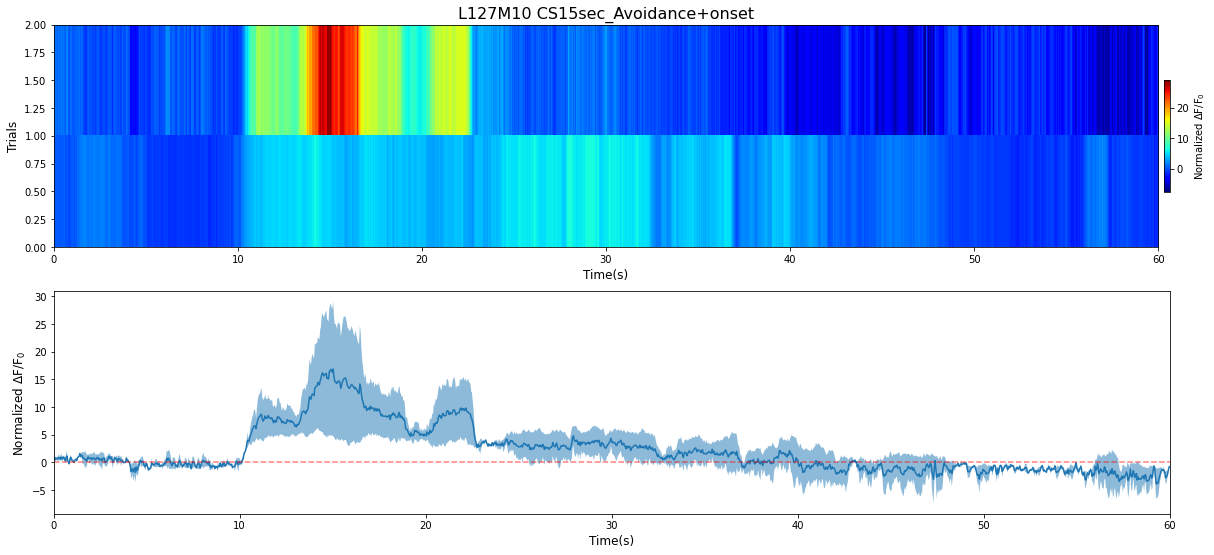

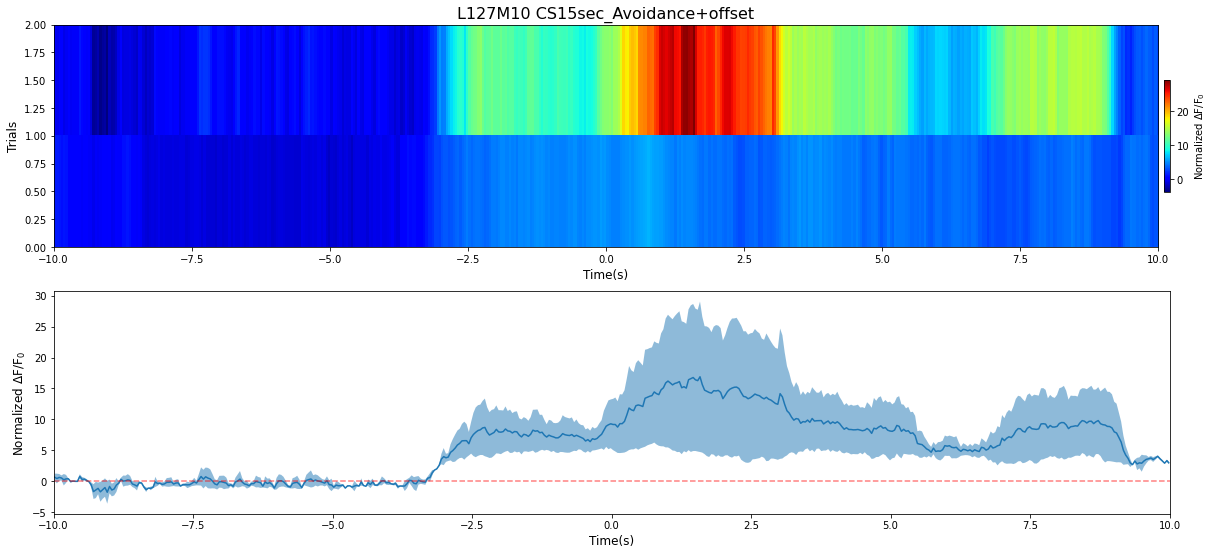

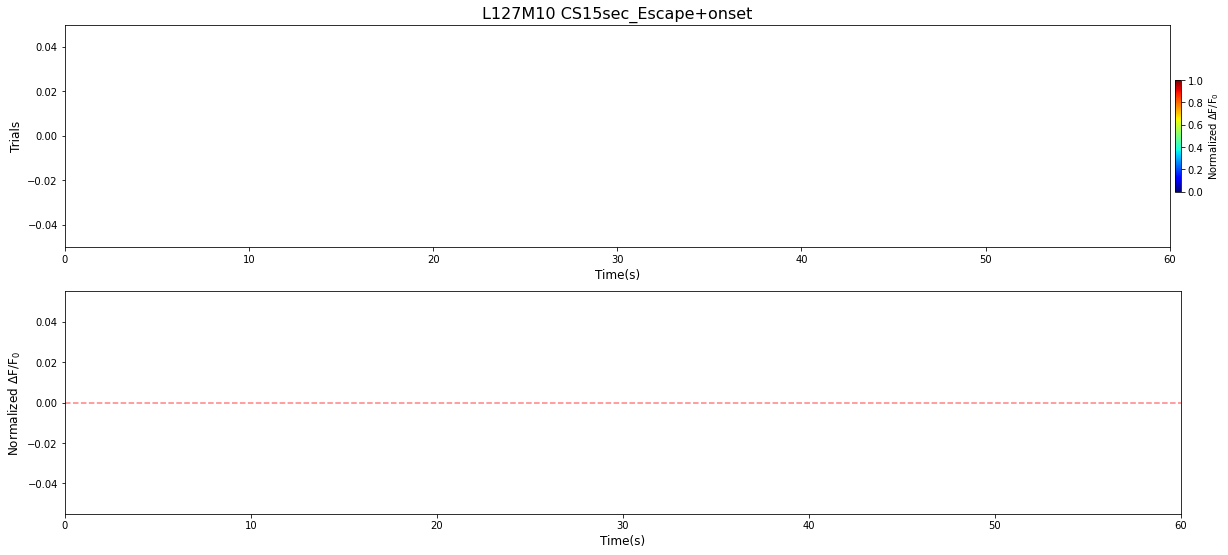

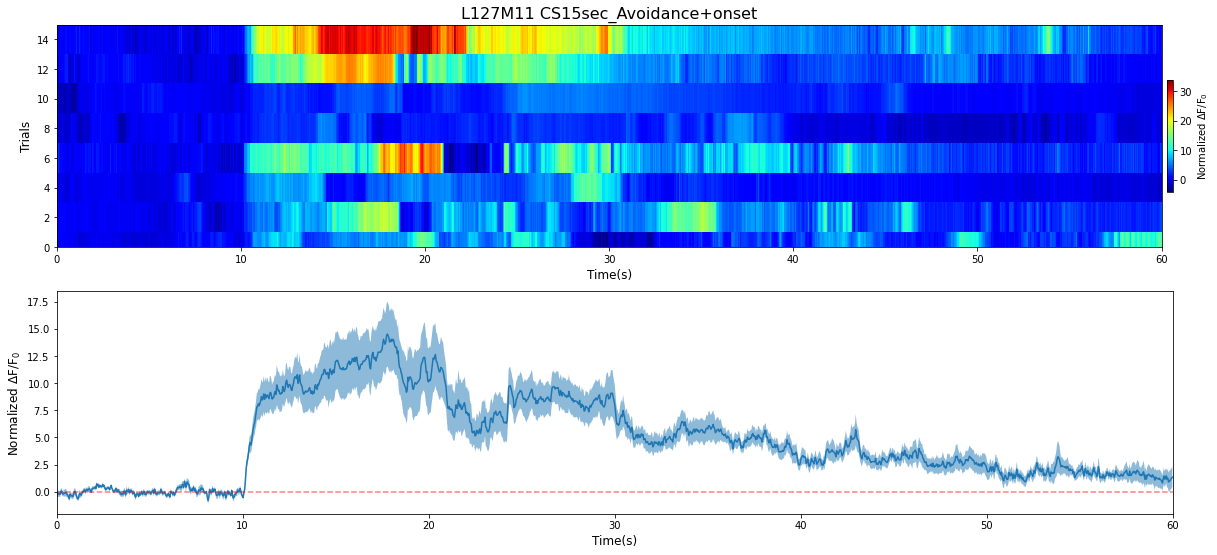

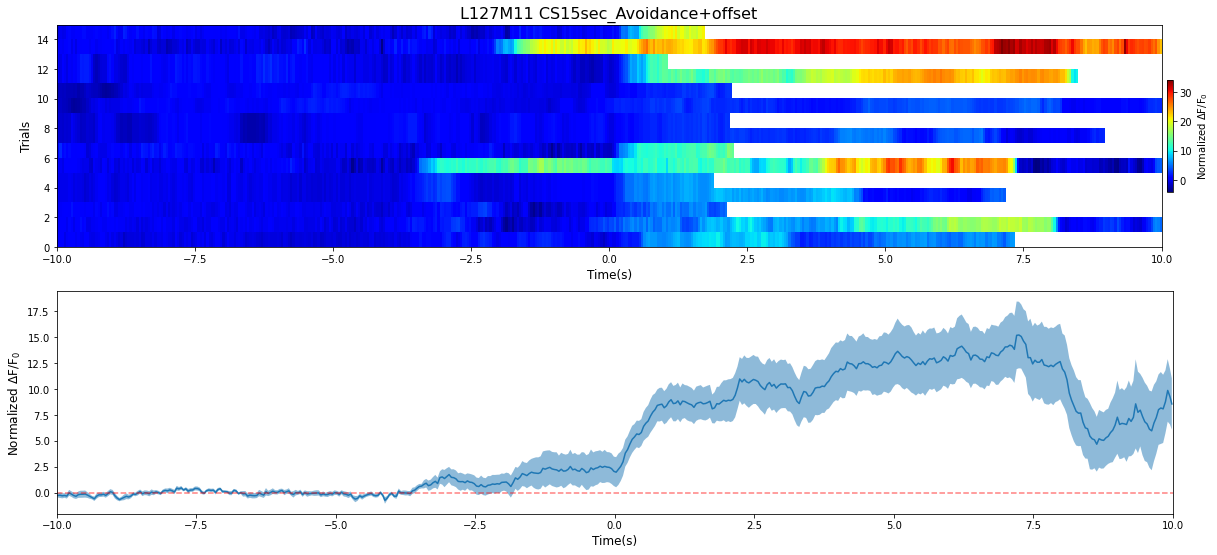

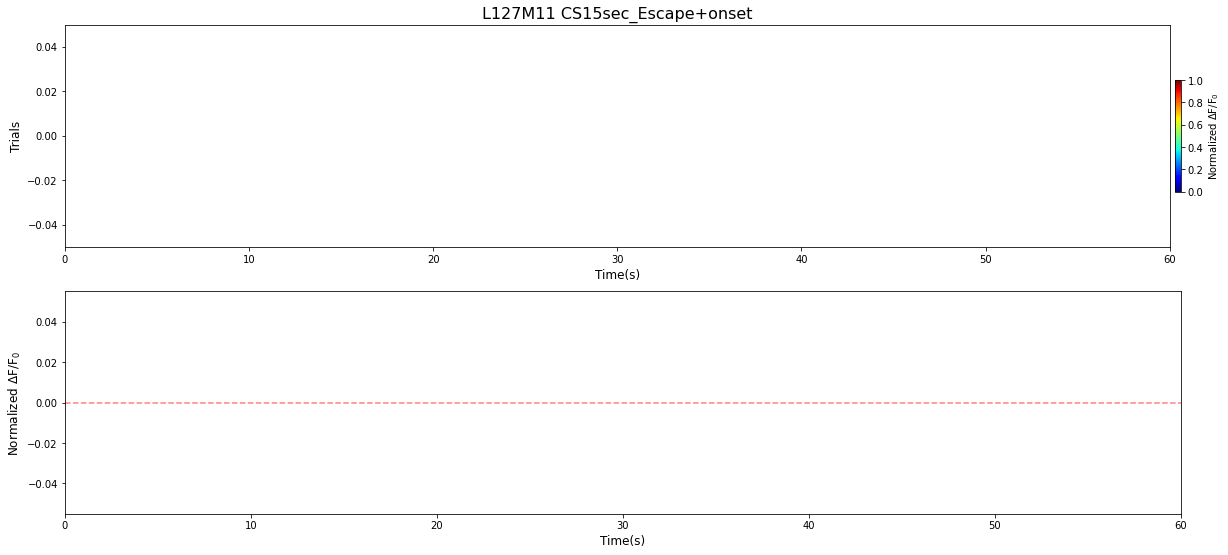

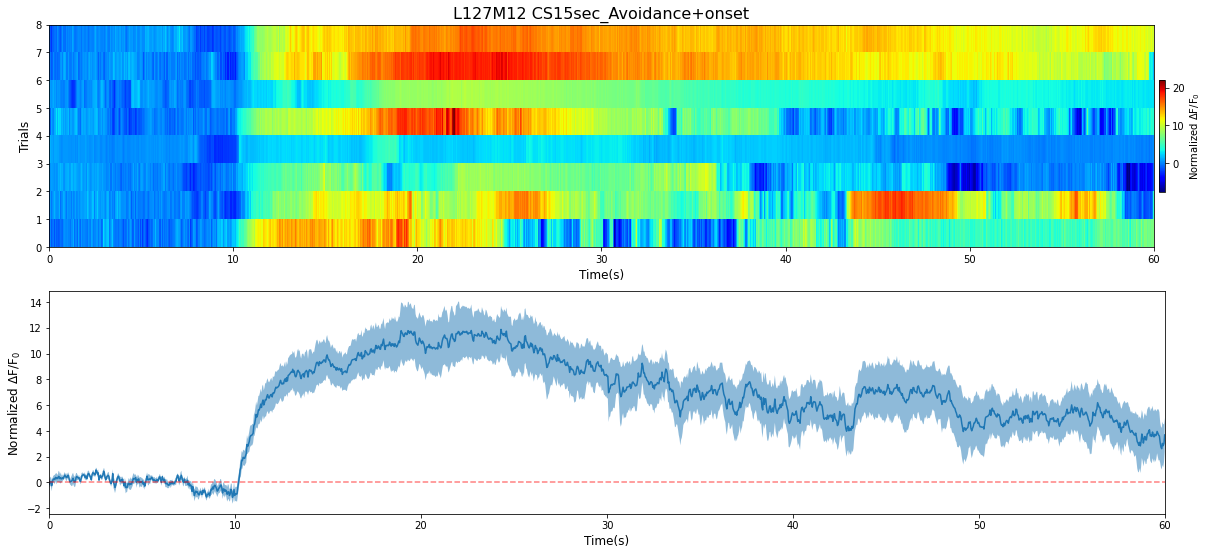

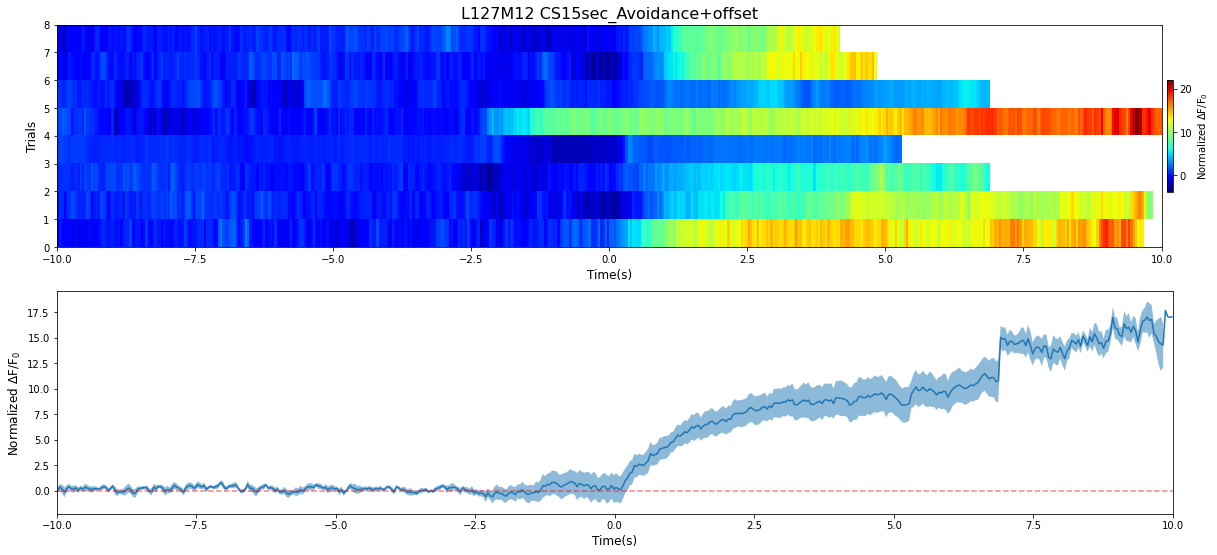

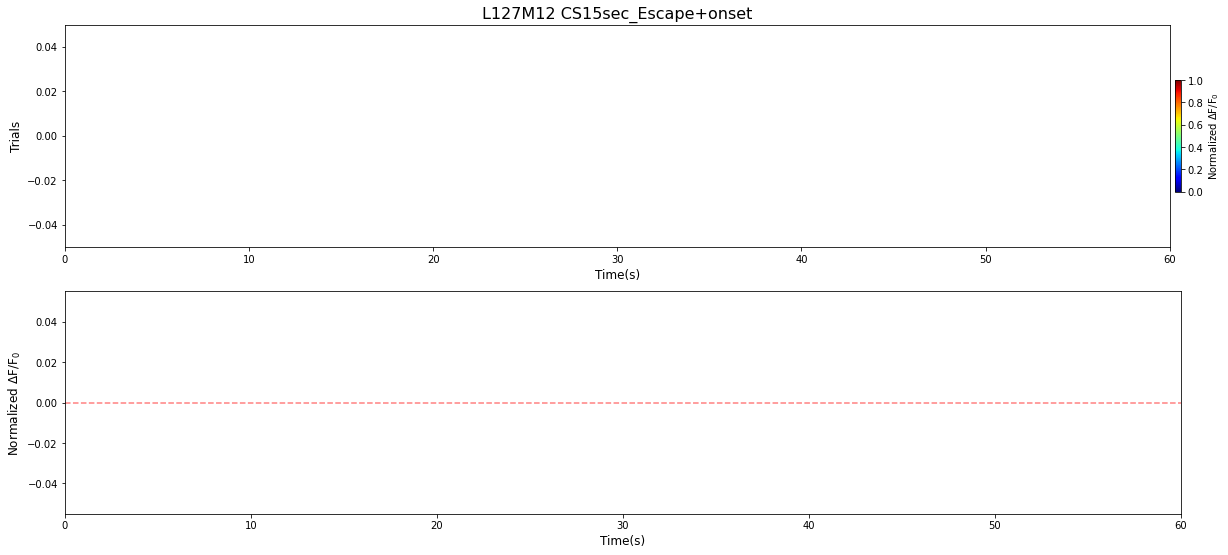

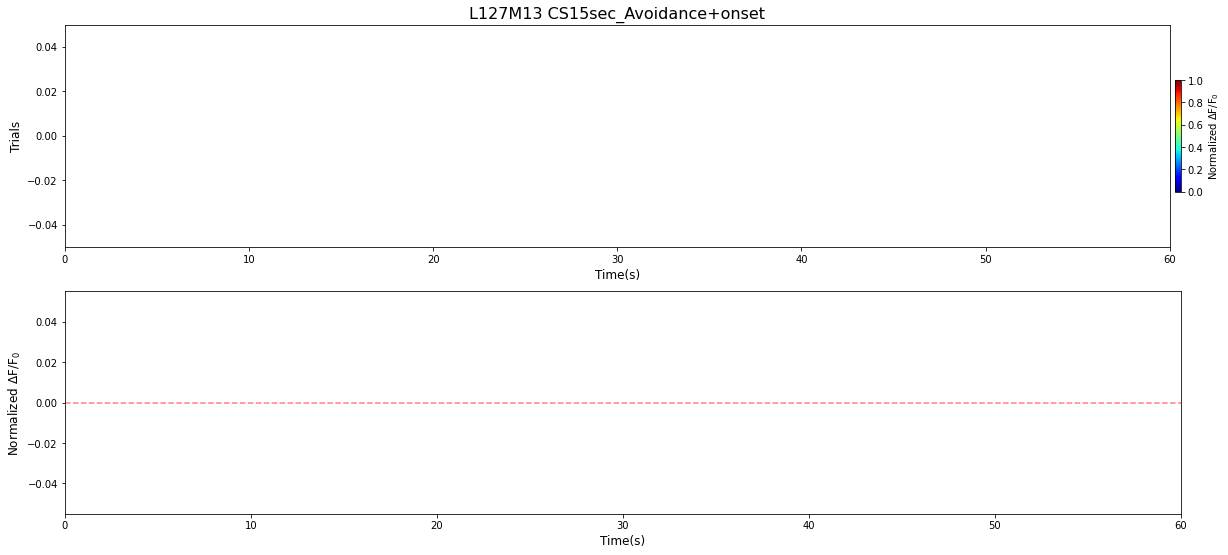

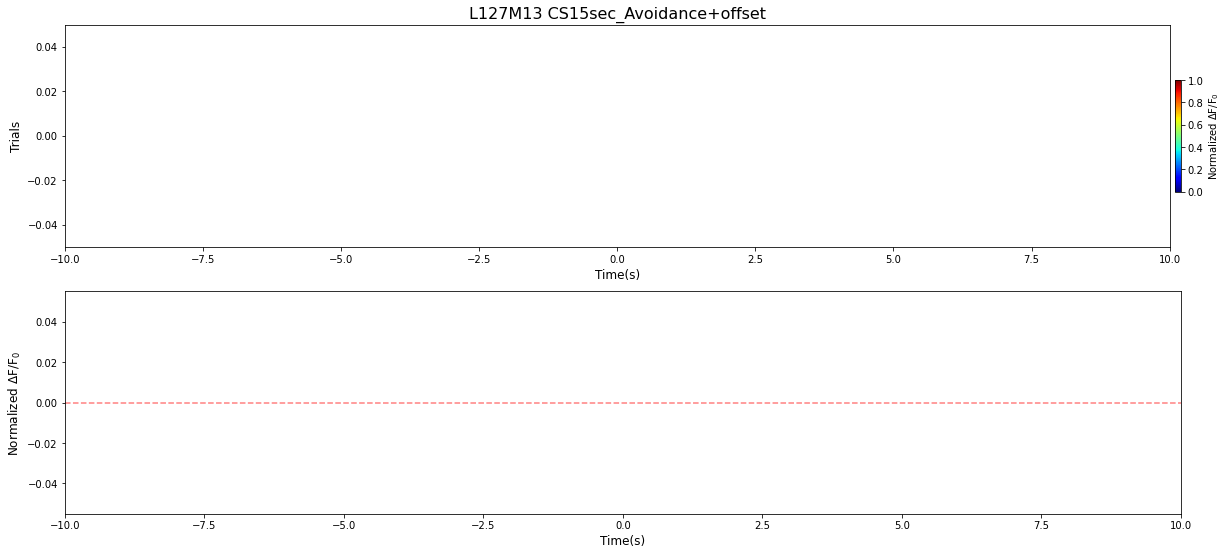

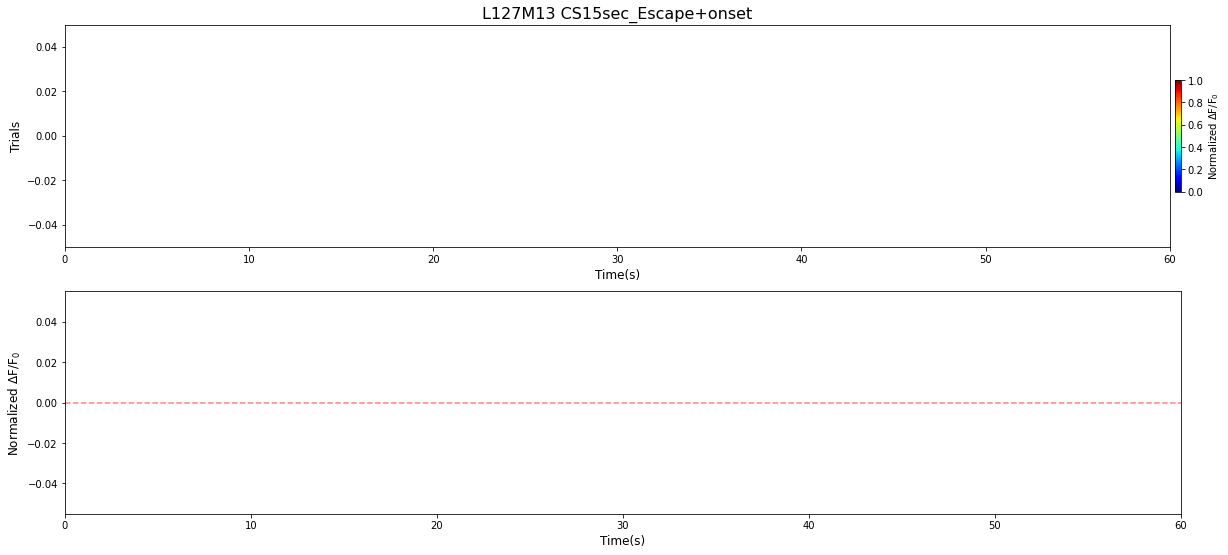

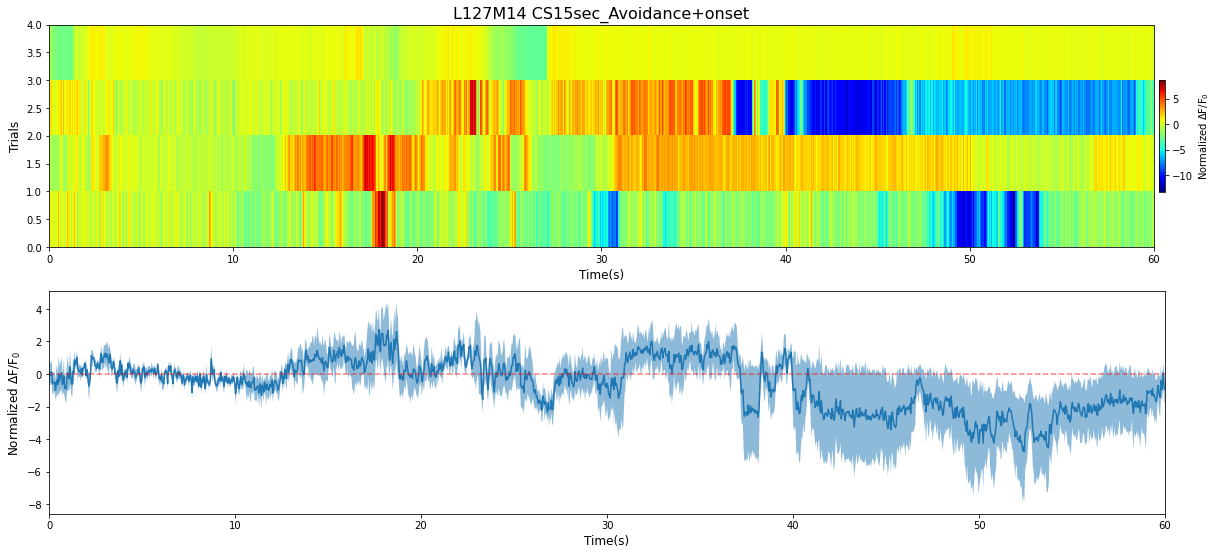

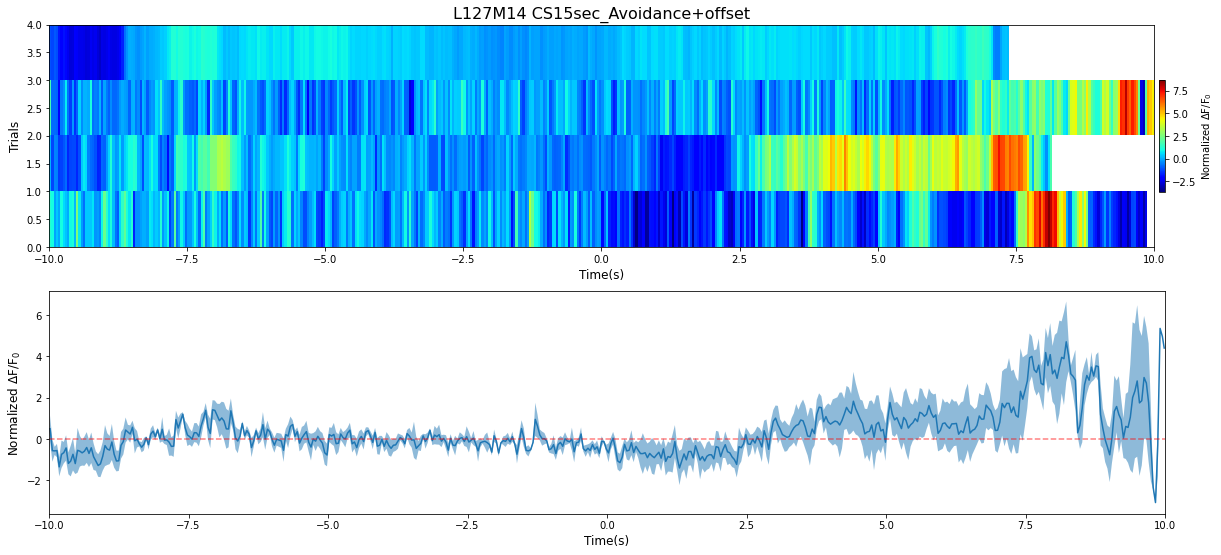

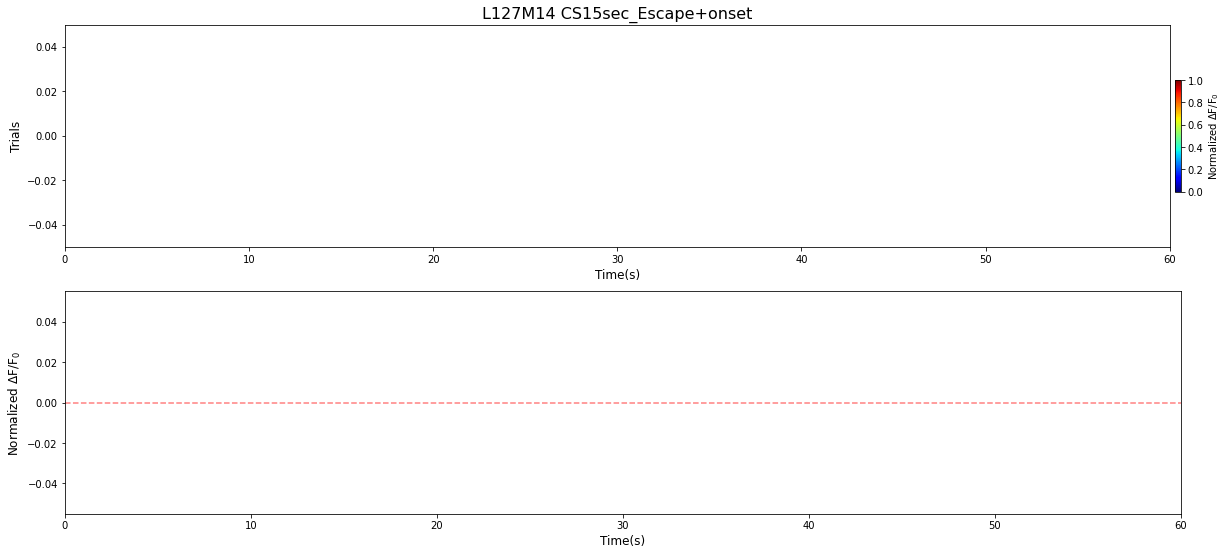

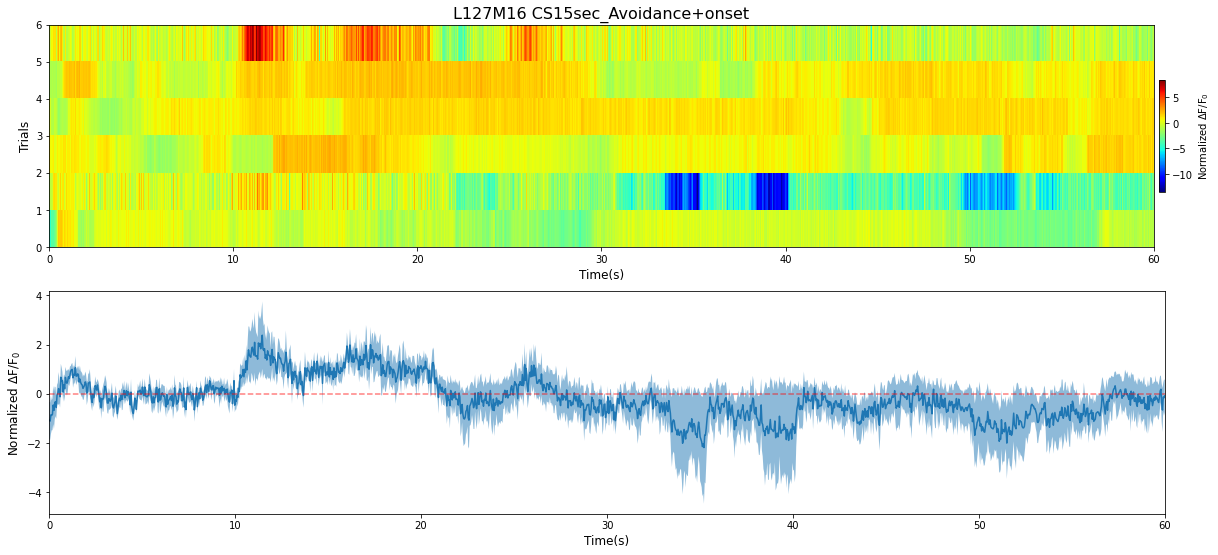

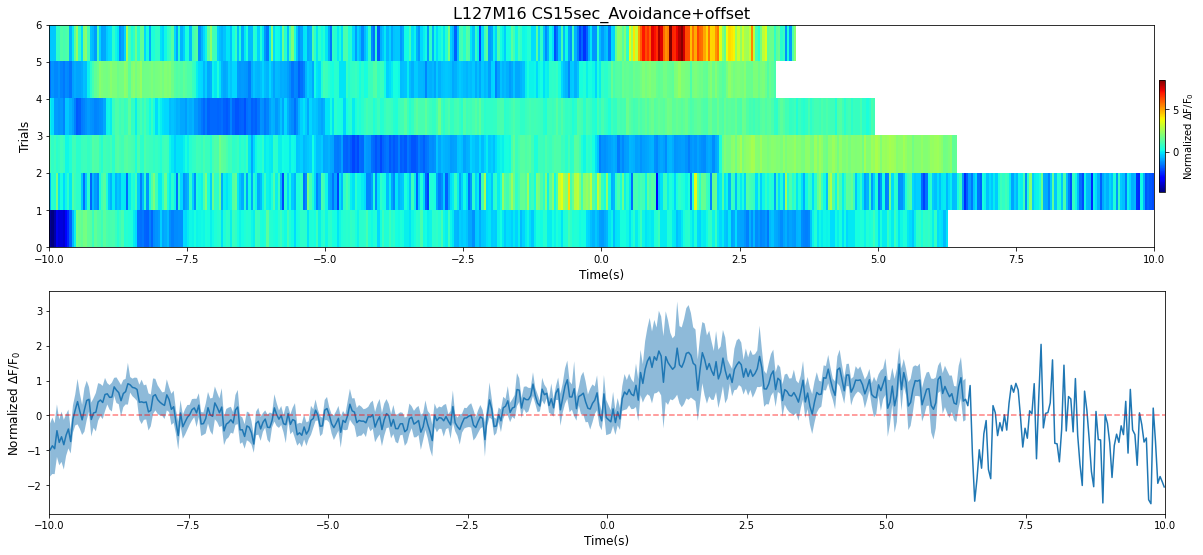

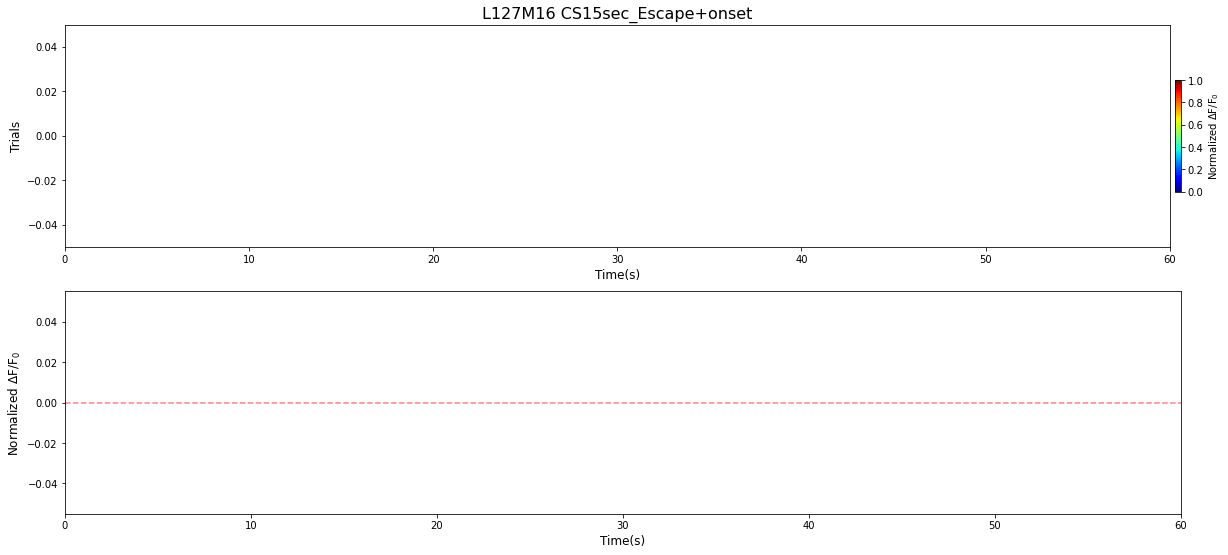

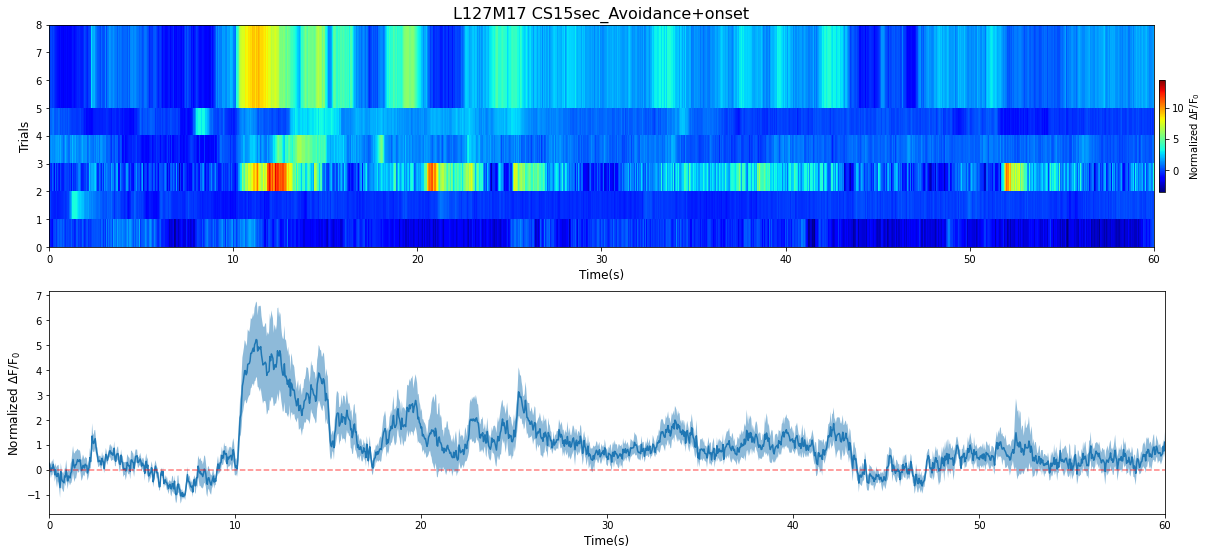

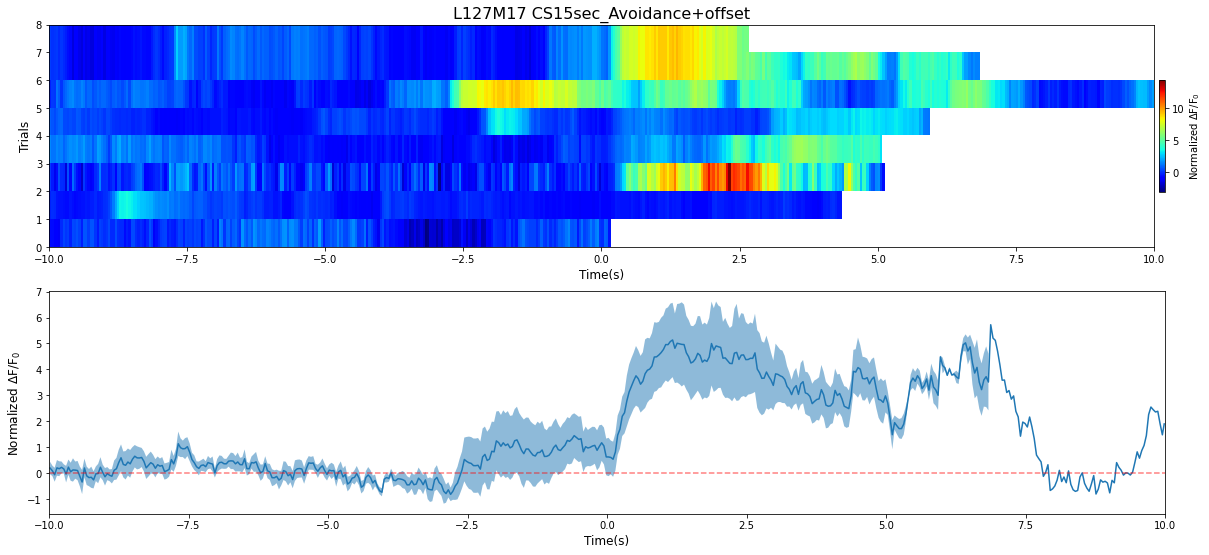

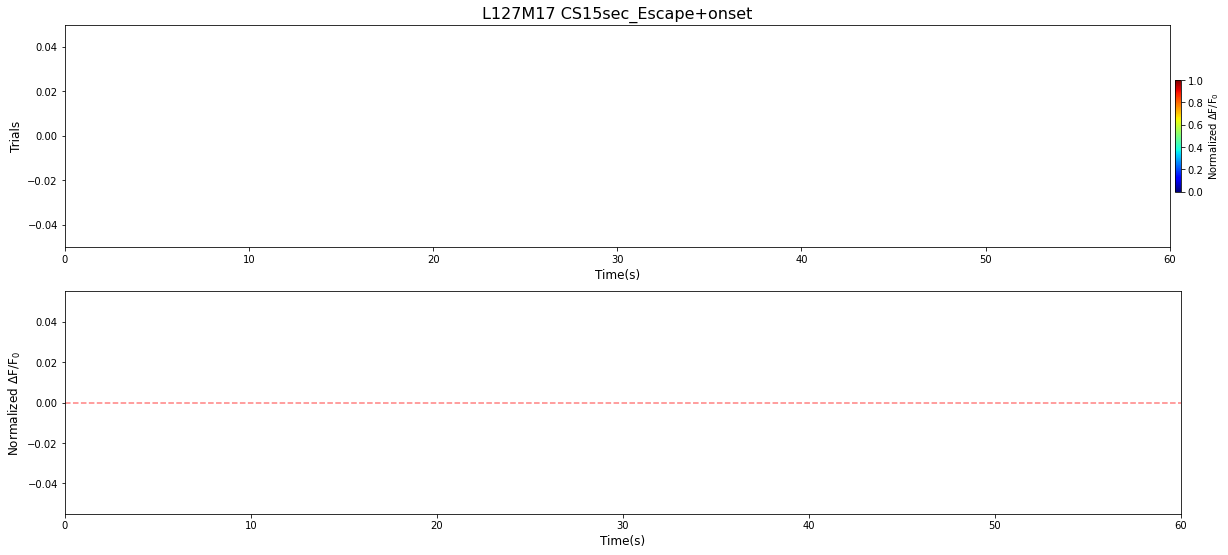

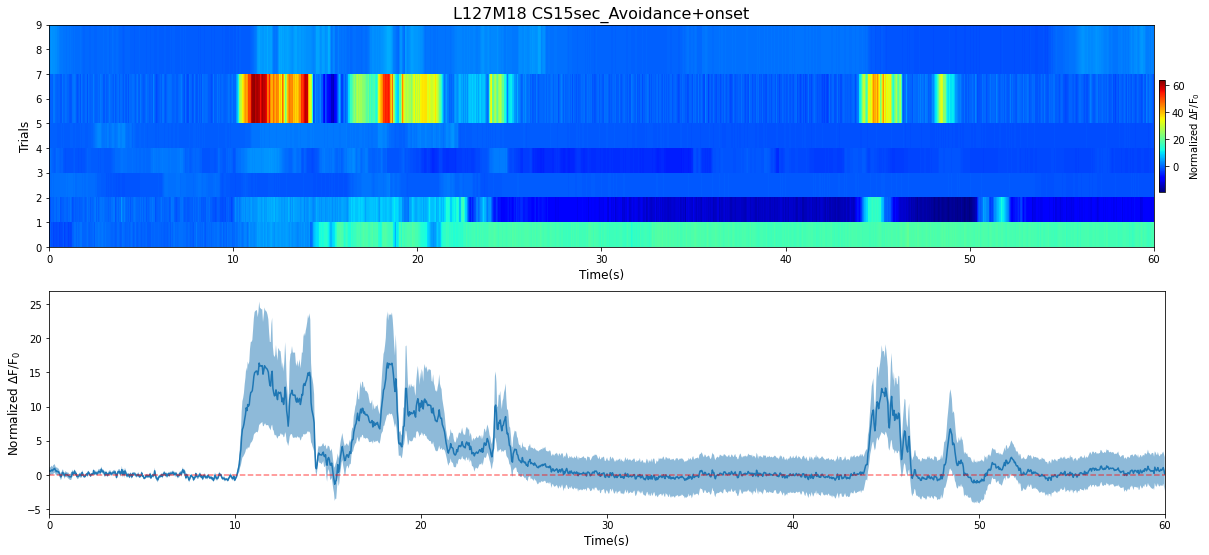

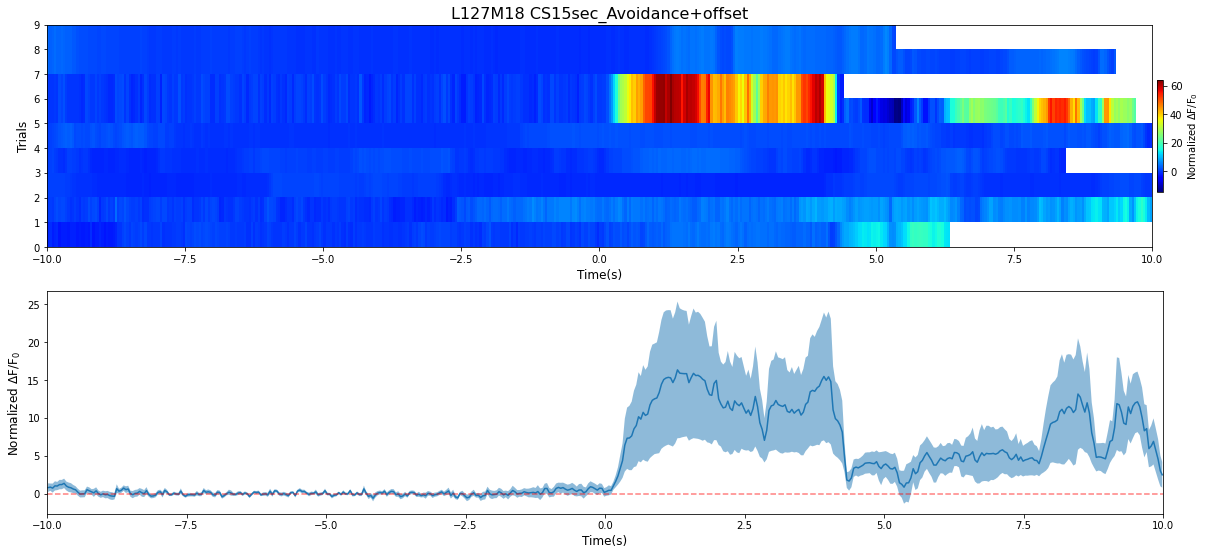

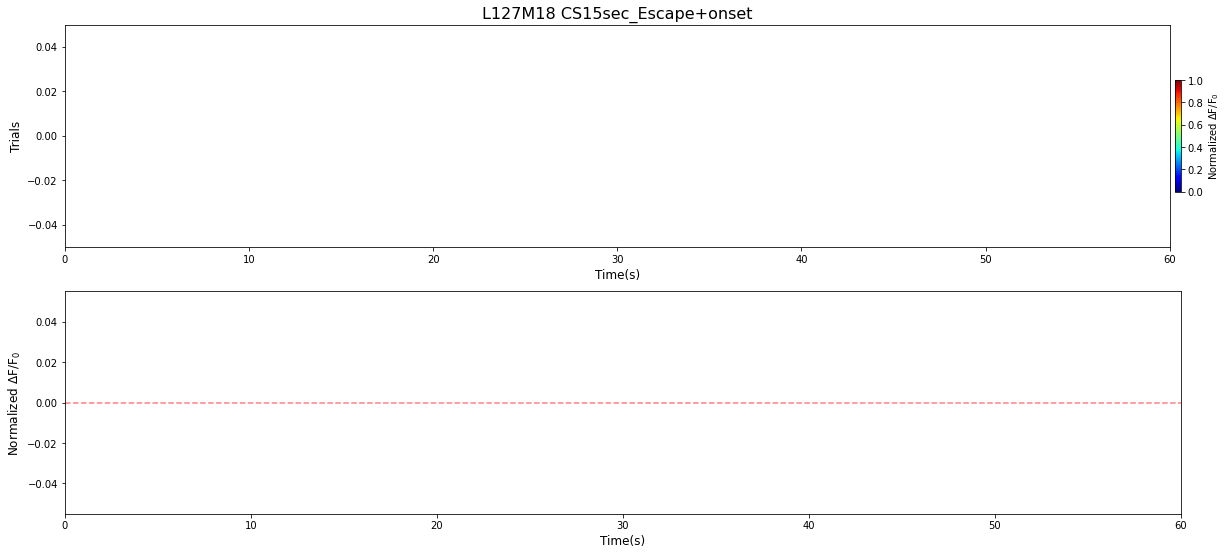

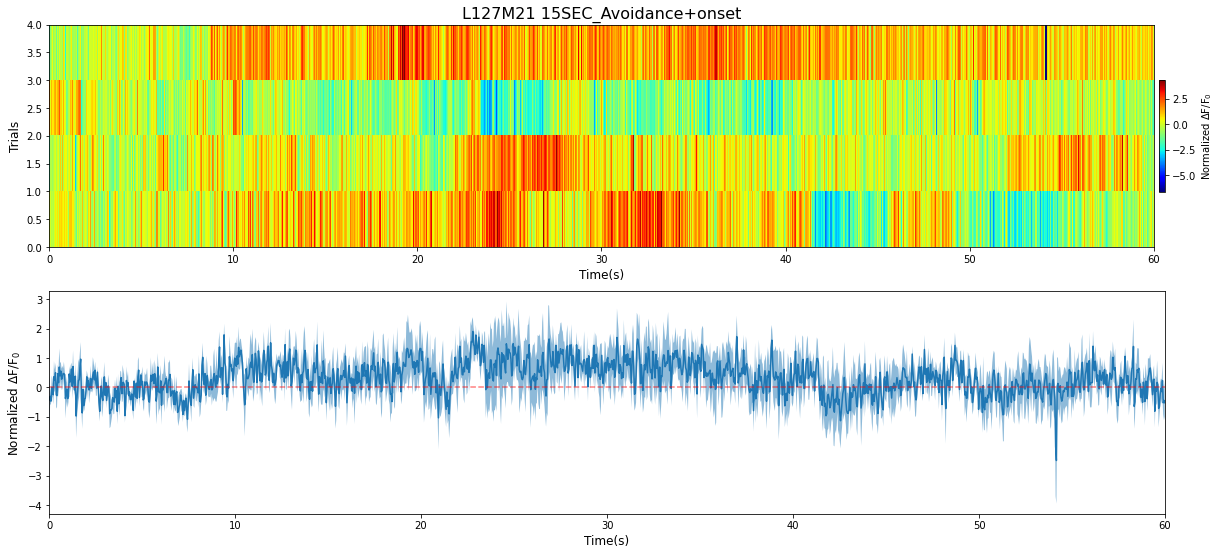

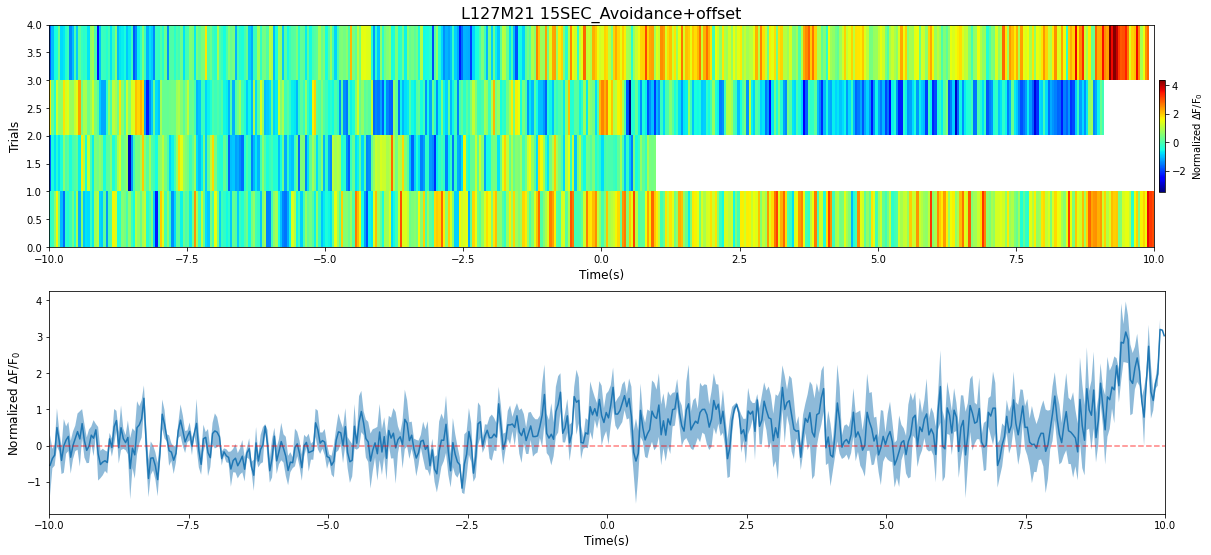

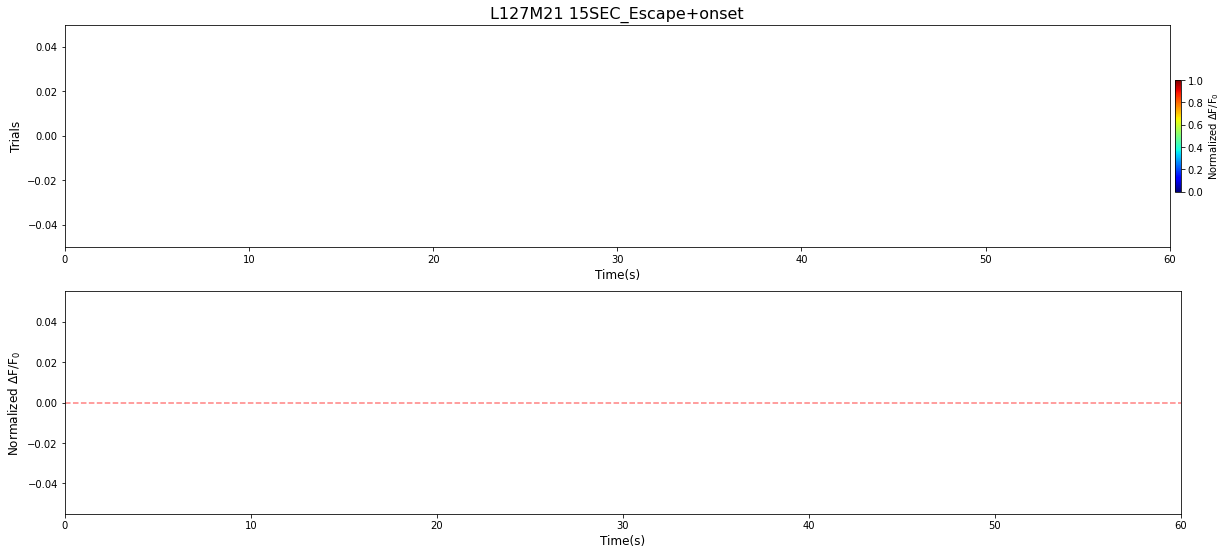

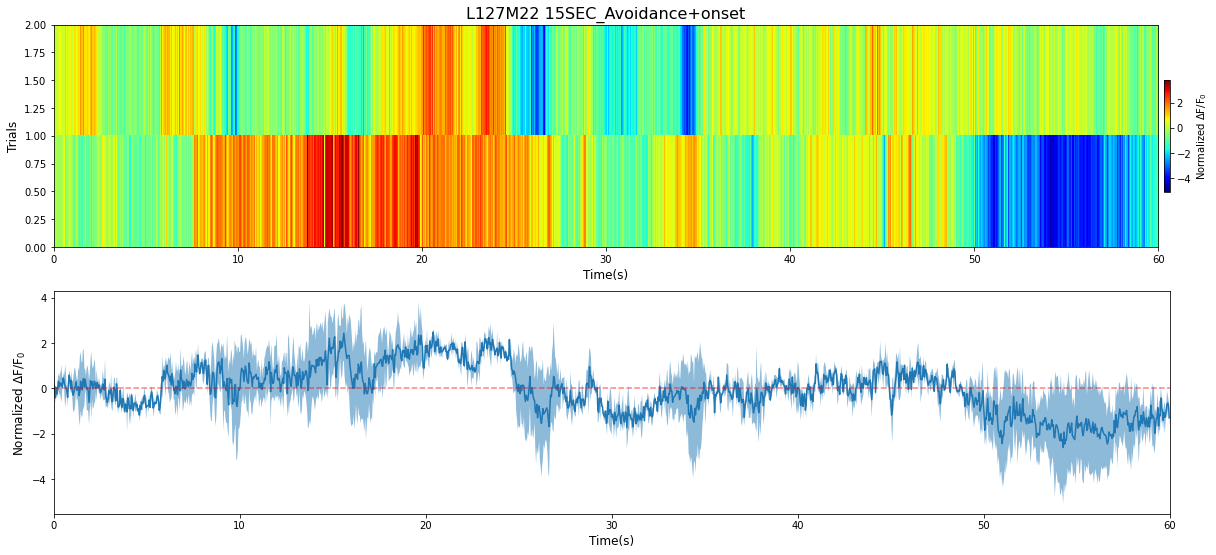

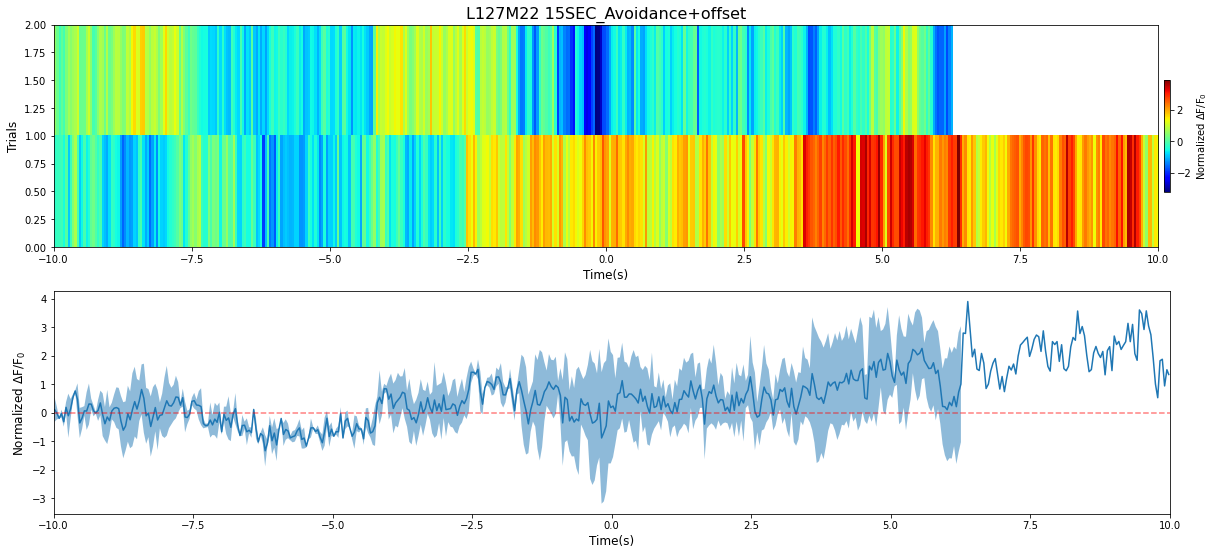

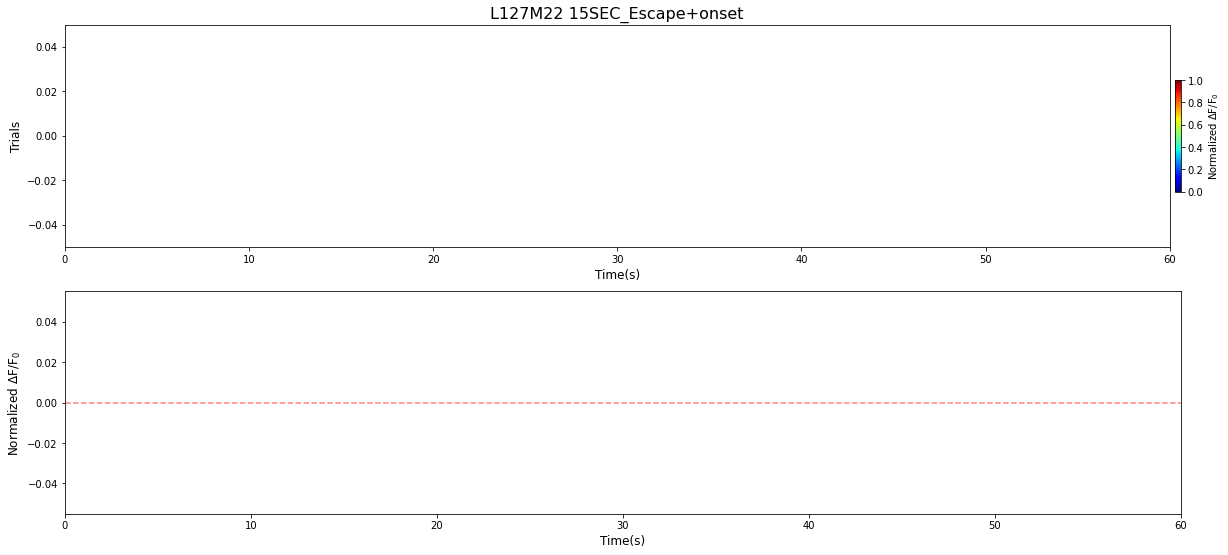

In [4]:
import math
import pandas as pd
import os
import numpy as np
import matplotlib
import scipy
from scipy import stats #row 별로 z-score 계산 
from pandas.io.excel import ExcelWriter
from matplotlib import pyplot as plt

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError: 
        print ('Error: Creating directory.' + directory)
#def graphandheatmap(dataframe):
    
path =r'D:\15sec'

FP_directoryname = path+'/FP/'
TTL_directoryname = path+'/TTL2/'
drop = 8000 #처음부터 제거할 행의 갯수, 8000 = 30초정도
#TTL 시점으로부터 Pre timepoint, Post timepoint를 입력, sec 단위 해당 구간 만을 export 함.
Pre = 0
Post = 60
Total = -Pre + Post
Pre2 = -10
Post2 = 10
Total2 = -Pre2 + Post2
#TTL signal을 어떠한 이름으로 정리했는지 표기할 것, 현재는 최대 두가지.
TTL1 = 'Avoidance+'
TTL2 = 'Escape+'

Timebin = 10

Sampleing_rate = 243.8108333333342
Sampleing_rate_inverse = 1/Sampleing_rate
#최종 정리 파일의 파일 경로와 이름 지정
output_excelfile_name1= path + '\Avoidance_onset.xlsx'
output_excelfile_name2= path + '\Avoidance_offset.xlsx'
output_excelfile_name3= path + '\Escape_onset.xlsx'
print (FP_directoryname) 

for root, dirs, files in os.walk(FP_directoryname):
    for fname in files:
        if('Signal.csv' in fname): 
            df = pd.DataFrame(columns = ['Time'])
            FP_fullname = os.path.join(root, fname)
            print(fname)
            print(FP_fullname)
            FP_data = pd.read_csv(FP_fullname, header = 0)
            FP_data.dropna
            FP_data = FP_data.drop(FP_data.index[0:drop])
            FP_data = FP_data.reset_index(drop=False)
            Time = pd.DataFrame(np.array(FP_data['Timestamp']))
            Data468 = np.array(FP_data['Signal']) 
            Data405 = np.array(FP_data['Control'])
            reg = np.polyfit(Data405, Data468, 1) #Data405를 Data468에 1차함수로 fitting
            a=float(reg[0])
            b=float(reg[1])

            ControlFit = a*Data405+b #Data405를 Data468에 1차함수로 fitting


            #df/f
            normDat = (Data468-ControlFit)/ControlFit; 
            normDatper = normDat*100
            normDatperdf = pd.DataFrame(normDatper)
            normDatperdf.rename(columns={normDatperdf.columns[0]:'df/f'}, inplace = True)
            normDatperdf['Time'] = FP_data['Timestamp']
            df2=pd.concat([df,normDatperdf])
            df=df2

            df2.to_csv(FP_directoryname[:-3]+fname[:-4]+'_dff.csv', index = 0)

            #Bouts
            csv_TTL = pd.read_csv(TTL_directoryname+'/'+fname[:-10]+'TTL.csv')

            Time = []
            Time2 = []
            
            Range = round(Total/Sampleing_rate_inverse)
            for i in range(Range):
                Time.append(i*Sampleing_rate_inverse+Pre)
            Range = round(Total2/Sampleing_rate_inverse)
            for i in range(Range):
                Time2.append(i*Sampleing_rate_inverse+Pre2)
                
######################### Raw Data 정리 끝 #################################    
            
            #TTL = csv_TTL['onset']
            csv_TTL1 = csv_TTL[csv_TTL['Event'] == TTL1]
            csv_TTL2 = csv_TTL[csv_TTL['Event'] == TTL2]
            #onsetTTL1 = csv_TTL1['onset']
            #onsetTTL2 = csv_TTL2['onset']
            #offsetTTL1 = csv_TTL1['onset'] - csv_TTL1['offset']
            
########################## TTL aligned Line graph & Heat map ################################ 

            TTL1_on_dff = pd.DataFrame(columns = ['Time'])
            TTL1_on_dff['Time']=Time
            T1 = pd.DataFrame(columns = ['Time'])
            T1['Time']=Time
            TTL1_off_dff = pd.DataFrame(columns = ['Time'])
            TTL1_off_dff['Time']=Time2
            
            #Z-score processing
            for i in range(len(csv_TTL1.iloc[:,0])):
                TTL1_on = csv_TTL1.iloc[i,1]
                TTL1_off = csv_TTL1.iloc[i,2] - csv_TTL1.iloc[i,1]
                df4 = pd.DataFrame(columns = ['df/f'])
                df4['df/f'] = df2.loc[(df2.iloc[:,0] >= TTL1_on + Pre) & (df2.iloc[:,0] <= TTL1_on + Post),'df/f']
                dffmean5 = (df2.loc[(df2.iloc[:,0] >= TTL1_on) & (df2.iloc[:,0] <= TTL1_on + 10), 'df/f'])
                
                #normalize or Z-scoreing
                df4['df/f'] = (df4['df/f'] - dffmean5.mean())/dffmean5.std()
                df4=df4.reset_index(drop=True)
                TTL1_on_dff=pd.concat([TTL1_on_dff,df4], axis=1)
                
                #TTL2에 대한 정리 -> 위에서 정리된 z-score 파일에 시간을 붙이고, 그 시간 중 avoidance timepoint를 기준으로 재정렬
                T2=pd.concat([T1,df4], axis=1) #임시로 T1과 df4를 합쳐서 시간을 붙임
                T3= pd.DataFrame(columns = ['df/f'])
                T3['df/f'] = T2.loc[(T2.iloc[:,0] >= TTL1_off + Pre2) & (T2.iloc[:,0] <= TTL1_off + Post2), 'df/f']
                T3=T3.reset_index(drop=True)
                TTL1_off_dff=pd.concat([TTL1_off_dff,T3], axis=1)
                
            
            #TTL1_onset
            listA=[*range(len(TTL1_on_dff.columns))]
            listA.remove(0)
            listA.insert(0,'Time')
            TTL1_on_dff.columns=listA
                        

            #Timebin (average를 통한 downsampling)
            n=int(len(TTL1_on_dff)/Timebin)
            bindf = pd.DataFrame(data = {TTL1_on_dff.columns[0] : list(range(n+1))}, columns = list(TTL1_on_dff.columns))
            for i in range(n):
                bindf.iloc[i,0:] = list(TTL1_on_dff.iloc[i*Timebin:(i+1)*Timebin,0:].mean())
            bindf.iloc[n,0:] = list(TTL1_on_dff.iloc[n*Timebin:, 0:].mean())
            bindf.to_csv(FP_fullname[:-10] + TTL1 + '_onset.csv', index = 0)

            #Graph and heatmap
            bindf.set_index('Time', inplace=True)
            graph = pd.DataFrame(columns = ['Mean','SEM'])
            graph['Mean']=bindf.mean(axis=1)
            graph['SEM']= (bindf.std(axis=1) / math.sqrt(len(bindf.columns)))

            fig = plt.figure(figsize=(20,9))
            ax1 = plt.subplot(211)
            bindft = bindf.transpose()
            bindft = bindft.astype(float)
            cs = ax1.imshow(bindft, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre, Post, 0, len(bindft.index)])
            cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
            ax1.set_xlabel('Time(s)', fontsize=12)
            ax1.set_ylabel('Trials',fontsize=12)
            ax1.set_title(fname[:-10] + TTL1 + 'onset', fontsize=16)
            ax0 = plt.subplot(212)
            ax0.plot(graph.index, graph['Mean'])
            ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
            ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
            ax0.set_xlabel('Time(s)', fontsize=12)
            ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
            ax0.set_xlim(xmin = Pre, xmax=Post)

            plt.savefig(FP_fullname[:-10] + TTL1 + '_onset.png', dpi=300, facecolor='#FFFFFF')
            
            #TTL1_offset
            
            listA=[*range(len(TTL1_off_dff.columns))]
            listA.remove(0)
            listA.insert(0,'Time')
            TTL1_off_dff.columns=listA                    
                        
            #Timebin
            n=int(len(TTL1_off_dff)/Timebin)
            bindf3 = pd.DataFrame(data = {TTL1_off_dff.columns[0] : list(range(n+1))}, columns = list(TTL1_off_dff.columns))
            for i in range(n):
                bindf3.iloc[i,0:] = list(TTL1_off_dff.iloc[i*Timebin:(i+1)*Timebin,0:].mean())
            bindf3.iloc[n,0:] = list(TTL1_off_dff.iloc[n*Timebin:, 0:].mean())
            bindf3.to_csv(FP_fullname[:-10] + TTL1 + '_offset.csv', index = 0)

            #Graph and heatmap
            bindf3.set_index('Time', inplace=True)
            graph = pd.DataFrame(columns = ['Mean','SEM'])
            graph['Mean']=bindf3.mean(axis=1)
            graph['SEM']= (bindf3.std(axis=1) / math.sqrt(len(bindf3.columns)))

            fig = plt.figure(figsize=(20,9))
            ax1 = plt.subplot(211)
            bindf3t = bindf3.transpose()
            bindf3t = bindf3t.astype(float)
            cs = ax1.imshow(bindf3t, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre2, Post2, 0, len(bindf3t.index)])
            cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
            ax1.set_xlabel('Time(s)', fontsize=12)
            ax1.set_ylabel('Trials',fontsize=12)
            ax1.set_title(fname[:-10] + TTL1 + 'offset', fontsize=16)
            ax0 = plt.subplot(212)
            ax0.plot(graph.index, graph['Mean'])
            ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
            ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
            ax0.set_xlabel('Time(s)', fontsize=12)
            ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
            ax0.set_xlim(xmin = Pre2, xmax=Post2)

            plt.savefig(FP_fullname[:-10] + TTL1 + '_offset.png', dpi=300, facecolor='#FFFFFF')
            
            #TTL2
                
            df6 = pd.DataFrame(columns = ['Time'])
            df6['Time']=Time    
        
            for i in range(len(csv_TTL2.iloc[:,0])):
                TTL2_on = csv_TTL2.iloc[i,1]
                df7 = pd.DataFrame(columns = ['df/f'])
                df7['df/f'] = df2.loc[(df2.iloc[:,0] >= TTL2_on + Pre) & (df2.iloc[:,0] <= TTL2_on + Post), 'df/f']
                dffmean5 = df2.loc[(df2.iloc[:,0] >= TTL2_on + Pre) & (df2.iloc[:,0] <= TTL2_on + 10), 'df/f']
                df7['df/f'] = (df7['df/f'] - dffmean5.mean())/dffmean5.std()
                df7=df7.reset_index(drop=True)
                df6=pd.concat([df6,df7], axis=1)
           
            listB=[*range(len(df6.columns))]
            listB.remove(0)
            listB.insert(0,'Time')
            df6.columns=listB
            
            #Timebin
            n=int(len(df6)/Timebin)
            bindf2 = pd.DataFrame(data = {df6.columns[0] : list(range(n+1))}, columns = list(df6.columns))
            for i in range(n):
                bindf2.iloc[i,0:] = list(df6.iloc[i*Timebin:(i+1)*Timebin,0:].mean())
            bindf2.iloc[n,0:] = list(df6.iloc[n*Timebin:, 0:].mean())
            bindf2.to_csv(FP_fullname[:-10] + TTL2 + '_onset.csv', index = 0)
            
            bindf2.set_index('Time', inplace=True)
            graph = pd.DataFrame(columns = ['Mean','SEM'])
            graph['Mean']=bindf2.mean(axis=1)
            graph['SEM']= (bindf2.std(axis=1) / math.sqrt(len(bindf2.columns)))

            fig=plt.figure(figsize=(20,9))
            ax1 = plt.subplot(211)
            bindf2t=bindf2.transpose()
            bindf2t = bindf2t.astype(float)
            cs = ax1.imshow(bindf2t, cmap=plt.cm.jet, interpolation='None', aspect="auto", 
                            extent=[Pre, Post, 0, len(bindf2t.index)])
            cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
            ax1.set_xlabel('Time(s)', fontsize=12)
            ax1.set_ylabel('Trials',fontsize=12)
            ax1.set_title(fname[:-10] + TTL2 + 'onset', fontsize=16)
            ax0 = plt.subplot(212)
            ax0.plot(graph.index, graph['Mean'])
            ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
            ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
            ax0.set_xlabel('Time(s)', fontsize=12)
            ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
            ax0.set_xlim(xmin = Pre, xmax=Post)

            plt.savefig(FP_fullname[:-10] + TTL2 + '_onset.png', dpi=300, facecolor='#FFFFFF')
            



In [2]:
import math
import pandas as pd
import os
import numpy as np
import matplotlib
import scipy
from scipy import stats #row 별로 z-score 계산 
from pandas.io.excel import ExcelWriter
from matplotlib import pyplot as plt
path = r'F:\Data\Two-way active avoidance behavior\Experiments 별 정리\pBLA Ppp1r1b GRAB DA'
output_excelfile_name1= path + '\Avoidance_onset.xlsx'
output_excelfile_name2= path + '\Avoidance_offset.xlsx'
output_excelfile_name3= path + '\Escape_onset.xlsx'
FP_directoryname = path+'/FP/'
TTL_directoryname = path+'/TTL/'

TTL1 = 'Avoidance+'
TTL2 = 'Escape+'

csv_file_TTL1 = []
csv_file_TTL2 = []
csv_file_TTL3 = []
A=TTL1+'_onset.csv' 
B=TTL1+'_offset.csv'
C=TTL2+'_onset.csv'
for root, dirs, files in os.walk(FP_directoryname):
    for fname in files:
        if(A in fname): 
            csv_file_TTL1.append(fname)
        elif(B in fname):
            csv_file_TTL2.append(fname)
        elif(C in fname):
            csv_file_TTL3.append(fname)

        csv_file_TTL1 = sorted(csv_file_TTL1)
        csv_file_TTL2 = sorted(csv_file_TTL2)
        csv_file_TTL3 = sorted(csv_file_TTL3)

with ExcelWriter(output_excelfile_name1) as ew:
    for csv_file in csv_file_TTL1:
        pd.read_csv(FP_directoryname+csv_file).to_excel(ew, index = False, sheet_name=csv_file[:-10], encoding='utf-8')
    
with ExcelWriter(output_excelfile_name2) as ew:
    for csv_file in csv_file_TTL2:
        pd.read_csv(FP_directoryname+csv_file).to_excel(ew, index = False, sheet_name=csv_file[:-10], encoding='utf-8')
        
with ExcelWriter(output_excelfile_name3) as ew:
    for csv_file in csv_file_TTL3:
        pd.read_csv(FP_directoryname+csv_file).to_excel(ew, index = False, sheet_name=csv_file[:-10], encoding='utf-8') 

In [ ]:
######################### Raw Data 정리 끝 #################################    
            
            #TTL = csv_TTL['onset']
            csv_TTL1 = csv_TTL[csv_TTL['Event'] == TTL1]
            csv_TTL2 = csv_TTL[csv_TTL['Event'] == TTL2]
            #onsetTTL1 = csv_TTL1['onset']
            #onsetTTL2 = csv_TTL2['onset']
            #offsetTTL1 = csv_TTL1['onset'] - csv_TTL1['offset']
            
########################## TTL aligned Line graph & Heat map ################################ 

            Time = pd.DataFrame(columns = ['Time'])
            Time['Time']=Time
            Time2 = pd.DataFrame(columns = ['Time'])
            Time2['Time']=Time2
        
            TTL1_on_dff = pd.DataFrame(columns = ['Time'])
            TTL1_on_dff['Time']=Time
            T1 = pd.DataFrame(columns = ['Time'])
            T1['Time']=Time
            
            #Z-score processing
            for i in ragne(len(csv_TTL1.iloc[:,0])):
                TTL1_on = csv_TTL1.iloc[i,1]
                TTL1_off = csv_TTL1.iloc[i,2] - csv_TTL1.iloc[i,1]
                df4 = pd.DataFrame(columns = ['df/f'])
                df4['df/f'] = df2.loc[(df2.iloc[:,0] >= TTL1_on - Pre) & (df2.iloc[:,0] <= TTL1_on + Post),'df/f']
                dffmean5 = df2.loc[(df2.iloc[:,0] >= target - Pre) & (df2.iloc[:,0] <= target), 'df/f']
                #Z-scoreing
                df4['df/f'] = (df4['df/f'] - dffmean5.mean())/dffmean5.std()
                df4=df4.reset_index(drop=True)
                TTL1_on_dff=pd.concat([TTL1_on_dff,df4], axis=1)
                #TTL2에 대한 정리 -> 위에서 정리된 z-score 파일에 시간을 붙이고, 그 시간 중 avoidance timepoint를 기준으로 재정렬
                T2 = pd.concat([T1,df4], axis=1) #임시로 T1과 df4를 합쳐서 시간을 붙임
                TTL1_off_dff = pd.DataFrame(columns = ['df/f'])
                TTL1_off_dff['df/f'] = T2.loc[(T2.iloc[:0] >= TTL1_off - Pre2) & (T2.iloc[:,0] <= TTL1_off + Post2), 'df/f']
            
            #TTL  갯수 만큼의 column을 만들어주는 code
            listA=[*range(len(TTL1_on_dff.columns))]
            listA.remove(0)
            listA.insert(0,'Time')
            TTL1_on_dff.columns=listA
                        

            #Timebin (average를 통한 downsampling)
            n=int(len(TTL1_on_dff)/Timebin)
            bindf = pd.DataFrame(data = {TTL1_on_dff.columns[0] : list(range(n+1))}, columns = list(TTL1_on_dff.columns))
            for i in range(n):
                bindf.iloc[i,0:] = list(TTL1_on_dff.iloc[i*Timebin:(i+1)*Timebin,0:].mean())
            bindf.iloc[n,0:] = list(TTL1_on_dff.iloc[n*Timebin:, 0:].mean())
            bindf.to_csv(FP_fullname[:-10] + TTL1 + '_onset.csv', index = 0)
            D1TTL1on['Time']=bindf['Time']
            D2TTL1on['Time']=bindf['Time']
            D3TTL1on['Time']=bindf['Time']
            D4TTL1on['Time']=bindf['Time']
            D5TTL1on['Time']=bindf['Time']
            #Graph and heatmap
            bindf.set_index('Time', inplace=True)
            graph = pd.DataFrame(columns = ['Mean','SEM'])
            graph['Mean']=bindf.mean(axis=1)
            graph['SEM']= (bindf.std(axis=1) / math.sqrt(len(bindf.columns)))

            fig = plt.figure(figsize=(20,9))
            ax1 = plt.subplot(211)
            bindft = bindf.transpose()
            bindft = bindft.astype(float)
            cs = ax1.imshow(bindft, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre, Post, 0, len(bindft.index)])
            cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
            ax1.set_xlabel('Time(s)', fontsize=12)
            ax1.set_ylabel('Trials',fontsize=12)
            ax1.set_title(fname[:-10] + TTL1 + 'onset', fontsize=16)
            ax0 = plt.subplot(212)
            ax0.plot(graph.index, graph['Mean'])
            ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
            ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
            ax0.set_xlabel('Time(s)', fontsize=12)
            ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
            ax0.set_xlim(xmin = Pre, xmax=Post)

            plt.savefig(FP_fullname[:-10] + TTL1 + '_onset.png', dpi=300, facecolor='#FFFFFF')
            
            #TTL1_offset
            
            listA=[*range(len(TTL1_off_dff.columns))]
            listA.remove(0)
            listA.insert(0,'Time')
            TTL1_off_dff.columns=listA                    
                        
            #Timebin
            n=int(len(TTL1_off_dff)/Timebin)
            bindf3 = pd.DataFrame(data = {TTL1_off_dff.columns[0] : list(range(n+1))}, columns = list(TTL1_off_dff.columns))
            for i in range(n):
                bindf3.iloc[i,0:] = list(TTL1_off_dff.iloc[i*Timebin:(i+1)*Timebin,0:].mean())
            bindf3.iloc[n,0:] = list(TTL1_off_dff.iloc[n*Timebin:, 0:].mean())
            bindf3.to_csv(FP_fullname[:-10] + TTL1 + '_offset.csv', index = 0)
            D1TTL1off['Time']=bindf3['Time']
            D2TTL1off['Time']=bindf3['Time']
            D3TTL1off['Time']=bindf3['Time']
            D4TTL1off['Time']=bindf3['Time']
            D5TTL1off['Time']=bindf3['Time']
            #Graph and heatmap
            bindf3.set_index('Time', inplace=True)
            graph = pd.DataFrame(columns = ['Mean','SEM'])
            graph['Mean']=bindf3.mean(axis=1)
            graph['SEM']= (bindf3.std(axis=1) / math.sqrt(len(bindf3.columns)))

            fig = plt.figure(figsize=(20,9))
            ax1 = plt.subplot(211)
            bindf3t = bindf3.transpose()
            bindf3t = bindf3t.astype(float)
            cs = ax1.imshow(bindf3t, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre2, Post2, 0, len(bindf3t.index)])
            cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
            ax1.set_xlabel('Time(s)', fontsize=12)
            ax1.set_ylabel('Trials',fontsize=12)
            ax1.set_title(fname[:-10] + TTL1 + 'offset', fontsize=16)
            ax0 = plt.subplot(212)
            ax0.plot(graph.index, graph['Mean'])
            ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
            ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
            ax0.set_xlabel('Time(s)', fontsize=12)
            ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
            ax0.set_xlim(xmin = Pre2, xmax=Post2)

            plt.savefig(FP_fullname[:-10] + TTL1 + '_offset.png', dpi=300, facecolor='#FFFFFF')

In [1]:
path = r'F:\Data\Two-way active avoidance behavior\Experiments 별 정리\VTA BLA axon terminal FP\FP Total'
FP_directoryname = path+'/FP/'
TTL_directoryname = path+'/TTL/'
FP_directoryname

output_excelfile_name1= path + '\Avoidance_onset.xlsx'
output_excelfile_name2= path + '\Avoidance_offset.xlsx'
output_excelfile_name3= path + '\Escape_onset.xlsx'

csv_file_TTL1 = []
csv_file_TTL2 = []
csv_file_TTL3 = []
A=TTL1+'_onset.csv' 
B=TTL1+'_offset.csv'
C=TTL2+'_onset.csv'
for root, dirs, files in os.walk(FP_directoryname):
    for fname in files:
        if(A in fname): 
            csv_file_TTL1.append(fname)
        elif(B in fname):
            csv_file_TTL2.append(fname)
        elif(C in fname):
            csv_file_TTL3.append(fname)
            
        csv_file_TTL1 = sorted(csv_file_TTL1)
        csv_file_TTL2 = sorted(csv_file_TTL2)
        csv_file_TTL3 = sorted(csv_file_TTL3)


with ExcelWriter(output_excelfile_name1) as ew:
    for csv_file in csv_file_TTL1:
        pd.read_csv(FP_directoryname+csv_file).to_excel(ew, index = False, sheet_name=csv_file[:-5], encoding='utf-8')
    
with ExcelWriter(output_excelfile_name2) as ew:
    for csv_file in csv_file_TTL2:
        pd.read_csv(FP_directoryname+csv_file).to_excel(ew, index = False, sheet_name=csv_file[:-5], encoding='utf-8')
        
with ExcelWriter(output_excelfile_name3) as ew:
    for csv_file in csv_file_TTL3:
        pd.read_csv(FP_directoryname+csv_file).to_excel(ew, index = False, sheet_name=csv_file[:-5], encoding='utf-8')  

NameError: name 'TTL1' is not defined

In [ ]:
            TTL 별로, Day 별로 Total csv와 graph 작성
            if 'D1' in fname:
                D1TTL1 = pd.merge(D1TTL1, bindf, on='Time')
                D1TTL2 = pd.merge(D1TTL2, bindf2, on='Time')
            elif 'D2' in fname:
                D2TTL1 = pd.merge(D2TTL1, bindf, on='Time')
                D2TTL2 = pd.merge(D2TTL2, bindf2, on='Time')
            elif 'D3' in fname:
                D3TTL1 = pd.merge(D3TTL1, bindf, on='Time')
                D3TTL2 = pd.merge(D3TTL2, bindf2, on='Time')
            elif 'D4' in fname:
                D4TTL1 = pd.merge(D4TTL1, bindf, on='Time')
                D4TTL2 = pd.merge(D4TTL2, bindf2, on='Time')
            elif 'D5' in fname:
                D5TTL1 = pd.merge(D5TTL1, bindf, on='Time')
                D5TTL2 = pd.merge(D5TTL2, bindf2, on='Time')
                
def heatmap_TTL1(Dataframe, FP_directoryname, FP_fullname, Pre, Post, TTL1, Total, Celltype):
    Dataframe.set_index('Time', inplace=True)
    graph = pd.DataFrame(columns = ['Mean','SEM'])
    graph['Mean']=Dataframe.mean(axis=1)
    graph['SEM']= (Dataframe.std(axis=1) / math.sqrt(len(Dataframe.columns)))

    fig=plt.figure(figsize=(20,30))
    ax1 = plt.subplot(211)
    Dataframet=Dataframe.transpose()
    Dataframet = Dataframe.astype(float)
    cs = ax1.imshow(Dataframet, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre, Post, 0, len(Dataframet.index)])
    cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
    ax1.set_xlabel('Time(s)', fontsize=12)
    ax1.set_ylabel('Trials',fontsize=12)
    ax1.set_title(FP_fullname[:-10] + TTL1, fontsize=16)
    ax0 = plt.subplot(212)
    ax0.plot(graph.index, graph['Mean'])
    ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
    ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
    ax0.set_xlabel('Time(s)', fontsize=12)
    ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
    ax0.set_xlim(xmin = Pre, xmax=Post)
    Figname = FP_directoryname+'/'+Celltype+'_'+Total+'_'+TTL1+'.png'      
    plt.savefig(Figname, dpi=300, facecolor='#FFFFFF')

def heatmap_TTL2(Dataframe, FP_directoryname, FP_fullname, Pre, Post, TTL2, Total, Celltype):
    Dataframe.set_index('Time', inplace=True)
    graph = pd.DataFrame(columns = ['Mean','SEM'])
    graph['Mean']=Dataframe.mean(axis=1)
    graph['SEM']= (Dataframe.std(axis=1) / math.sqrt(len(Dataframe.columns)))

    fig=plt.figure(figsize=(20,30))
    ax1 = plt.subplot(211)
    Dataframet=Dataframe.transpose()
    Dataframet =Dataframet.astype(float)
    cs = ax1.imshow(Dataframet, cmap=plt.cm.jet, interpolation='None', aspect="auto", extent=[Pre, Post, 0, len(Dataframet.index)])
    cbar = fig.colorbar(cs, pad=0.005, fraction=0.005, label=r'Normalized $\Delta$F/F$_0$')
    ax1.set_xlabel('Time(s)', fontsize=12)
    ax1.set_ylabel('Trials',fontsize=12)
    ax1.set_title(FP_fullname[:-10] + TTL2, fontsize=16)
    ax0 = plt.subplot(212)
    ax0.plot(graph.index, graph['Mean'])
    ax0.fill_between(graph.index, graph['Mean']-graph['SEM'], graph['Mean']+graph['SEM'], alpha=0.5)
    ax0.axhline(0, 0, 1, linestyle='--', color='r', alpha=0.5)
    ax0.set_xlabel('Time(s)', fontsize=12)
    ax0.set_ylabel(r'Normalized $\Delta$F/F$_0$', fontsize=12)
    ax0.set_xlim(xmin = Pre, xmax=Post)
    Figname = FP_directoryname+'/'+Celltype+'_'+Total+'_'+TTL2+'.png'      
    plt.savefig(Figname, dpi=300, facecolor='#FFFFFF')

heatmap_TTL1(D1TTL1, FP_directoryname, FP_fullname, Pre, Post, TTL1, 'Total_D1', Celltype)
heatmap_TTL1(D2TTL1, FP_directoryname, FP_fullname, Pre, Post, TTL1, 'Total_D2', Celltype)
heatmap_TTL1(D3TTL1, FP_directoryname, FP_fullname, Pre, Post, TTL1, 'Total_D3', Celltype)
heatmap_TTL1(D4TTL1, FP_directoryname, FP_fullname, Pre, Post, TTL1, 'Total_D4', Celltype)
heatmap_TTL1(D5TTL1, FP_directoryname, FP_fullname, Pre, Post, TTL1, 'Total_D5', Celltype)
heatmap_TTL2(D1TTL2, FP_directoryname, FP_fullname, Pre, Post, TTL2, 'Total_D1', Celltype)
heatmap_TTL2(D2TTL2, FP_directoryname, FP_fullname, Pre, Post, TTL2, 'Total_D2', Celltype)
heatmap_TTL2(D3TTL2, FP_directoryname, FP_fullname, Pre, Post, TTL2, 'Total_D3', Celltype)
heatmap_TTL2(D4TTL2, FP_directoryname, FP_fullname, Pre, Post, TTL2, 'Total_D4', Celltype)
heatmap_TTL2(D5TTL2, FP_directoryname, FP_fullname, Pre, Post, TTL2, 'Total_D5', Celltype)
#하나의 excel file로 합치기

In [ ]:
#정렬된 Heatmap